## Train and test a classification model using Vehicle dataset

In this task, the objective is to 
1. buld a model which classifies vehicles into four categories namely: bus, saab, opel, van 
based on the different features. 
2. compute an evaluation metric on a held-out test set

In [1]:
#Import necessary libraries
import helper
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../dev')


# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


### Import data and data Exploration

In [2]:
data = pd.read_csv('../../datasets/vehicles.csv')
data.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [3]:
data.head().T #To view the data without scrolling to the left or right

,0,1,2,3,4
COMPACTNESS,95,91,104,93,85
CIRCULARITY,48,41,50,41,44
DISTANCE_CIRCULARITY,83,84,106,82,70
RADIUS_RATIO,178,141,209,159,205
PR.AXIS_ASPECT_RATIO,72,57,66,63,103
MAX.LENGTH_ASPECT_RATIO,10,9,10,9,52
SCATTER_RATIO,162,149,207,144,149
ELONGATEDNESS,42,45,32,46,45
PR.AXIS_RECTANGULARITY,20,19,23,19,19
MAX.LENGTH_RECTANGULARITY,159,143,158,143,144


In [4]:
data.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
helper.data_description(data)

Shape of the data:(846, 19) 



Vehicle unique Classes ['van' 'saab' 'bus' 'opel'] 4 



Any Missing values? False


Data tyoe of each column COMPACTNESS                   int64
CIRCULARITY                   int64
DISTANCE_CIRCULARITY          int64
RADIUS_RATIO                  int64
PR.AXIS_ASPECT_RATIO          int64
MAX.LENGTH_ASPECT_RATIO       int64
SCATTER_RATIO                 int64
ELONGATEDNESS                 int64
PR.AXIS_RECTANGULARITY        int64
MAX.LENGTH_RECTANGULARITY     int64
SCALED_VARIANCE_MAJOR         int64
SCALED_VARIANCE_MINOR         int64
SCALED_RADIUS_OF_GYRATION     int64
SKEWNESS_ABOUT_MAJOR          int64
SKEWNESS_ABOUT_MINOR          int64
KURTOSIS_ABOUT_MAJOR          int64
KURTOSIS_ABOUT_MINOR          int64
HOLLOWS_RATIO                 int64
Class                        object
dtype: object


This data contains all numerical features except the Class column which is the dependent variable(The target)

In [6]:
print(data.Class.value_counts())

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64


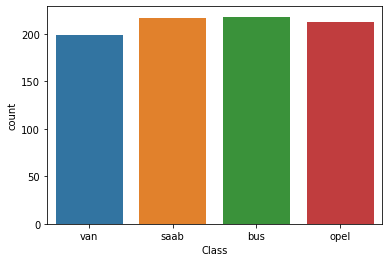

In [7]:
sns.countplot(data['Class'])

In [8]:
#data_normal is a copy of the original data before label encoding the class column
#therfore data_normal will be used when the actual names of the features in the class is needed to display
data_normal =data.copy()

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Class"]=le.fit_transform(data["Class"])
data.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0


Since all our independent variables are numeric and the target variable has been label encoded, we can calculate the correlations between these independent variables and the target.

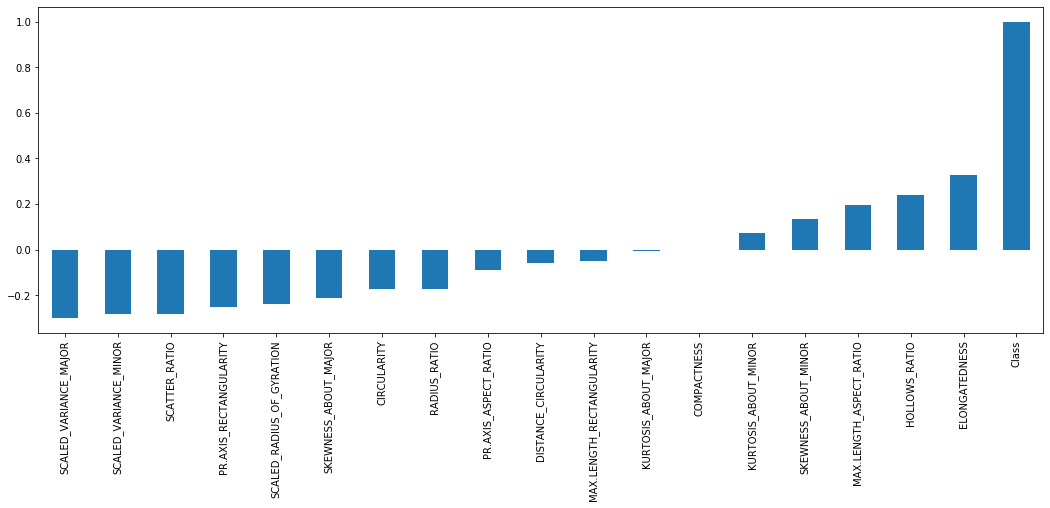

In [10]:
data.corr()['Class'].sort_values().plot(kind='bar', figsize=(18, 6))

The Visualization above shows that 
1. the following columns(ELONGATEDNESS, HOLLOWS_RATIO, MAX.LENGTH_ASPECT_RATIO,  SKEWNESS_ABOUT_MINOR) has a high positive correlation with the target column,Class.
2. The COMPACTNESS column has negligible/no correlation with the target column.


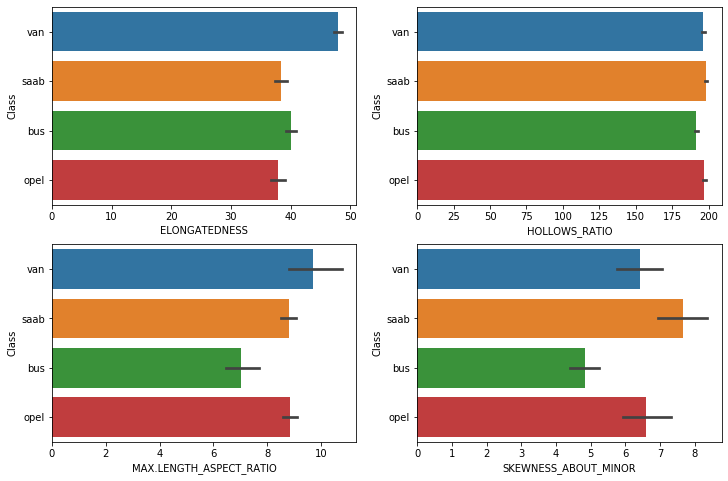

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# plot on 0 row and 0 column
sns.barplot(x="ELONGATEDNESS",y="Class", data=data_normal ,ax=ax[0, 0])
sns.barplot(x="HOLLOWS_RATIO",y="Class", data=data_normal ,ax=ax[0, 1])
sns.barplot(x="MAX.LENGTH_ASPECT_RATIO",y="Class", data=data_normal ,ax=ax[1, 0])
sns.barplot(x="SKEWNESS_ABOUT_MINOR",y="Class", data=data_normal ,ax=ax[1, 1])
#ax[0,0].bar( x="ELONGATEDNESS",y="Class", data=data_normal)

#sns.barplot(data=pivot,Class,ELONGATEDNESS)

In [12]:
X = data.drop(["Class"],axis =1) #Segregating variables- Dependent and the independent variable
X.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In [13]:
y = pd.DataFrame(data.iloc[:,-1]) #Dependent Variable
y.head()

,Class
0,3
1,3
2,2
3,3
4,0


In [14]:
col=X.columns #Independent Variable columns
col

Index(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO',
       'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO',
       'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY',
       'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR',
       'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR',
       'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR',
       'HOLLOWS_RATIO'],
      dtype='object')

In [15]:
x= helper.scale_fit_transform_data(X, col) #scaled the data 
x.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
0,0.160580,0.508950,0.057819,0.270806,1.307291,0.311542,-0.205844,0.136570,-0.224944,0.758332,-0.402383,-0.344935,0.285812,-0.329056,-0.076711,0.380991,-0.313722,0.183957
1,-0.325470,-0.626268,0.121261,-0.835244,-0.595396,0.094079,-0.597112,0.520843,-0.610954,-0.344578,-0.593611,-0.622416,-0.513517,-0.061767,0.533610,0.156925,0.010937,0.452977
2,1.254193,0.833298,1.517005,1.197496,0.546217,0.311542,1.148544,-1.144341,0.933086,0.689401,1.095564,1.104766,1.392577,0.071877,1.550812,-0.403238,-0.151393,0.049447
3,-0.082445,-0.626268,-0.005624,-0.297166,0.165679,0.094079,-0.747600,0.648935,-0.610954,-0.344578,-0.912323,-0.741337,-1.466565,-1.264566,-0.076711,-0.291206,1.634233,1.529056
4,-1.054545,-0.139746,-0.766939,1.077923,5.239511,9.444962,-0.597112,0.520843,-0.610954,-0.275646,1.669245,-0.650731,0.408786,7.288670,0.533610,-0.179173,-1.450029,-1.699181


### Splits the data into train and test set

Now we can use the train_test_split function to split the data into testing and training. The test_size= 0.2 indicates the percentage of the data that is held out for testing. It's usually around 80/20 or 70/30 0r 75/25 depending on the size of the dataset and parameter complexity.

The vehicle dataset has 846 rows which qualifies it as a small data set. It is advisable to use a high percentage as training data

#### The splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. This is called stratified cross-validation

In [16]:
#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= helper.split(x,y)

Now that the data set has been successfully splitted,
The best model for training and testing has to be selected

In [17]:
#from sklearn.model_selection import cross_val_score
helper.spot_check_algorithm(x_train, y_train,random_state=42)

KNN: 0.703122 (0.058058)
NB: 0.435339 (0.051158)
SVC: 0.744506 (0.031067)
RFC: 0.720895 (0.039421)
LR: 0.769726 (0.040348)


In [18]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN

Automating the process of cross validation for different K-Neighbors

In [19]:
clf = KNN(n_neighbors =5)
clf.fit(x_train, y_train)

score1 = clf.score(x_train, y_train)

score = clf.score(x_test, y_test)
score, score1

#from sklearn.model_selection import cross_val_score
#score = cross_val_score( KNN(n_neighbors = 1) , X = train_x, y = train_y, cv = 10)
#score

(0.7452830188679245, 0.8170347003154574)

In [20]:
from sklearn.svm import SVC

In [21]:
clf_svc = SVC(gamma='auto')
clf_svc.fit(x_train, y_train)

score1 = clf_svc.score(x_train, y_train)

score = clf_svc.score(x_test, y_test)
score, score1

(0.7830188679245284, 0.8280757097791798)

In [22]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( KNN(n_neighbors = 5) , X = x_train, y = y_train, cv = 10)
score

array([0.75384615, 0.67692308, 0.69230769, 0.63492063, 0.76190476,
       0.77777778, 0.66666667, 0.77777778, 0.68253968, 0.60655738])

In [23]:
from sklearn.ensemble import RandomForestClassifier as rfc
clf_rfc = rfc()
clf_rfc.fit(x_train, y_train)

score1 = clf_rfc.score(x_train, y_train)

score = clf_rfc.score(x_test, y_test)
score, score1

(0.7830188679245284, 0.9889589905362776)

In [24]:
x_train, x_test, y_train, y_test= helper.split(X,y)




In [25]:
x_train.shape,x_test.shape

((634, 18), (212, 18))

In [26]:
helper.spot_check_algorithm(x_train, y_train, n_splits=10) #Explore different algorithms to pick the best

KNN: 0.637683 (0.064620)
NB: 0.435339 (0.051158)
SVC: 0.293196 (0.031705)
RFC: 0.728981 (0.033862)
LR: 0.785502 (0.040761)


In [27]:
y_pred = helper.train_SVC(x_train, y_train,x_test,y_test) #Train with SVC with highest accuracy
y_pred.head()

,0
0,2
1,2
2,2
3,2
4,2


In [28]:
y_pred.columns = ['Class'] #Assign column name
y_pred.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [29]:
Results = helper.print_results(y_test, y_pred) # Prints Accuracy, Classification report and Confusion matrix

Accuracy: 29.71698113207547
              precision    recall  f1-score   support

           0       0.15      1.00      0.25         8
           1       0.00      0.00      0.00         0
           2       1.00      0.27      0.42       203
           3       0.02      1.00      0.04         1

    accuracy                           0.30       212
   macro avg       0.29      0.57      0.18       212
weighted avg       0.96      0.30      0.41       212

[[ 8  0  0  0]
 [ 0  0  0  0]
 [47 53 54 49]
 [ 0  0  0  1]]


C:\Users\OPEYEMI OSAKUADE\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


According to the above confusion matrix, it is observed that overall the model has not perform good as,

For False Positive case, it can be observed that 18 points that are misclassified by the model belongs to "saab" Class, which is missclassifies as they originally belong to "opel" Class, similarly 20 data points has been missclassified for belonging to "opel" class, but originally they belong to "saab" class.
As a result, we can conclude the model is not sucessfully able to classify points between "opel" and "saab" class.

The confusion matrix above shows that for
1. Bus: Support Vector Classifier predicted 36 out of 38 correctly, with 2 misclassified
Therefore,
* how often the classifier classified an image as a bus and it turns out correct (precision) is 97%.
* how often the classifier classified an image an image of a bus as a bus  
correctly and the recall(95%)
2. Opel: The classifier predicted 20 out of 24 correctly
3. Saab: The classifier predicted 30 out of 59 correctly
4. Van: The classifier predicted 43 out of 49 correctly

In [30]:
x_train_t, x_test_t, y_train_t, y_test_t= helper.split(X,y,split_ratio=0.3)

TypeError: split() got an unexpected keyword argument 'split_ratio'

In [ ]:
x_train_t.shape,x_test_t.shape

In [ ]:
y_pred_t = helper.train_SVC(x_train_t, y_train_t,x_test_t,y_test_t) #Train with SVC with highest accuracy
y_pred_t.head()

In [ ]:
helper.spot_check_algorithm(x_train_t, y_train_t, n_splits=10 ) #Explore different algorithms to pick the best

In [ ]:
y_pred_t.columns = ['Class'] #Assign column name
y_pred_t.head()

In [ ]:
Results = helper.print_results(y_test_t, y_pred_t) # Prints Accuracy, Classification report and Confusion matrix

In [ ]:
x_train_th, x_test_th, y_train_th, y_test_th= helper.split(X,y,split_ratio=0.25)

In [ ]:
x_train_th.shape,x_test_th.shape

In [ ]:
helper.spot_check_algorithm(x_train_th, y_train_th, n_splits=10 ) #Explore different algorithms to pick the best

In [ ]:
y_pred_th = helper.train_SVC(x_train_th, y_train_th,x_test_th,y_test_th) #Train with SVC with highest accuracy
y_pred_th.head()


In [ ]:
y_pred_th.columns = ['Class'] #Assign column name
y_pred_th.head()

In [ ]:
Results = helper.print_results(y_test_th, y_pred_th) # Prints Accuracy, Classification report and Confusion matrix